<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [13]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

## The following describes the dataset variables:

*      CRIM - per capita crime rate by town

*      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

*      INDUS - proportion of non-retail business acres per town.

*      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

*      NOX - nitric oxides concentration (parts per 10 million)

*      RM - average number of rooms per dwelling

*      AGE - proportion of owner-occupied units built prior to 1940

*      DIS - weighted distances to five Boston employment centres

*      RAD - index of accessibility to radial highways

*      TAX - full-value property-tax rate per $10,000

*      PTRATIO - pupil-teacher ratio by town

*      LSTAT - % lower status of the population

*      MEDV - Median value of owner-occupied homes in $1000's

# Task 2: Descriptive Statistics and Visualizations
## For the "Median value of owner-occupied homes" provide a boxplot

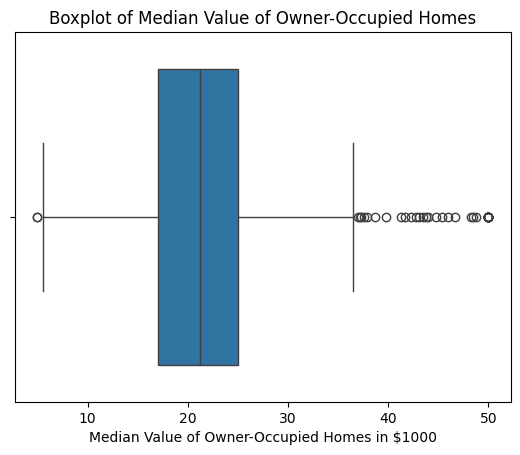

In [29]:
# Boxplot for the "Median value of owner-occupied homes"
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.xlabel('Median Value of Owner-Occupied Homes in $1000')
pyplot.show()

## Provide a  bar plot for the Charles river variable

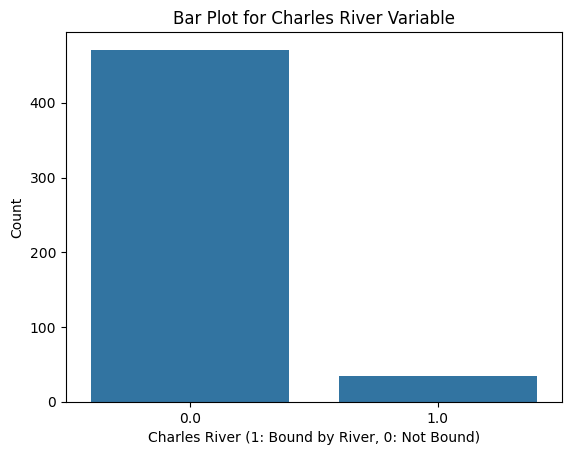

In [30]:
# Bar plot for the Charles River variable
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot for Charles River Variable')
pyplot.xlabel('Charles River (1: Bound by River, 0: Not Bound)')
pyplot.ylabel('Count')
pyplot.show()

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

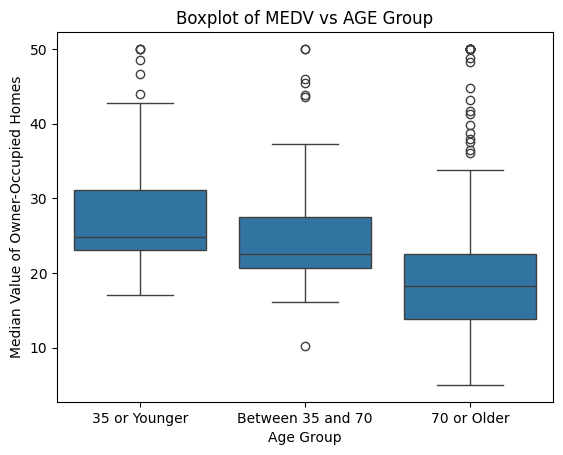

In [31]:
# Boxplot for MEDV vs AGE (Discretize AGE into three groups)
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 or Younger', 'Between 35 and 70', '70 or Older'])
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs AGE Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes')
pyplot.show()

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

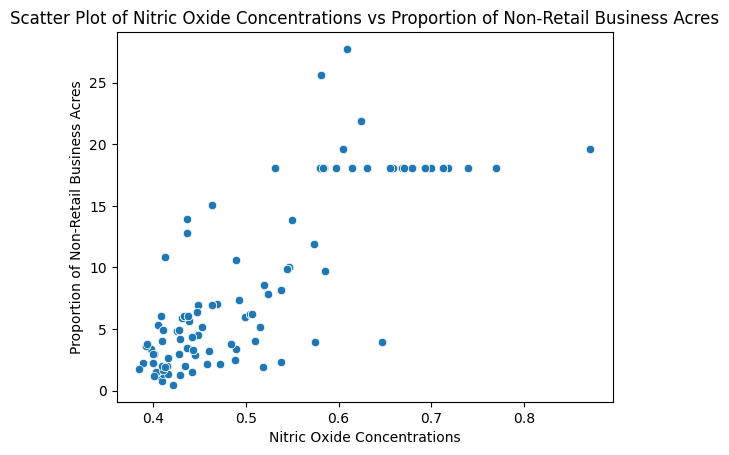

In [32]:
# Scatter plot to show relationship between NOX and INDUS
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
pyplot.xlabel('Nitric Oxide Concentrations')
pyplot.ylabel('Proportion of Non-Retail Business Acres')
pyplot.show()

There is a significant positive relationship between Nitric Oxide concentrations and the proportion of non-retail business acres. This suggests that industrial areas (with more non-retail business acres) tend to have higher levels of Nitric Oxide pollution, which is consistent with the idea that industrial activities contribute to air pollution.

##     Create a histogram for the pupil to teacher ratio variable

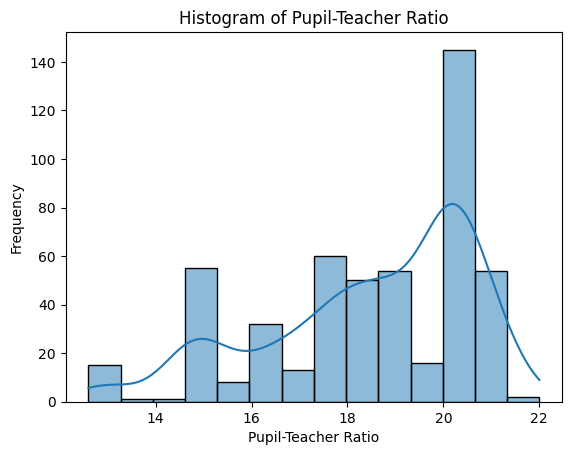

In [35]:
# Histogram for the pupil-teacher ratio (PTRATIO)
sns.histplot(boston_df['PTRATIO'], kde=True)
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

# Task 3: Statistical Tests
## Test 1: Is there a significant difference in median value of houses bounded by the Charles river or not?
### T-test for independent samples

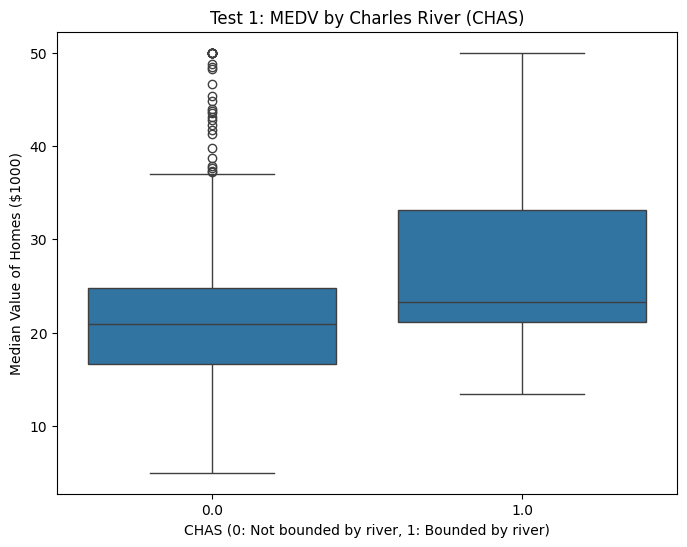

Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles river or not.


In [42]:
# Visualization: Boxplot of MEDV by CHAS
plt.figure(figsize=(8, 6))
sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
plt.title('Test 1: MEDV by Charles River (CHAS)')
plt.xlabel('CHAS (0: Not bounded by river, 1: Bounded by river)')
plt.ylabel('Median Value of Homes ($1000)')
plt.show()

# Perform the T-test (for reference)
group_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
group_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(group_0, group_1)
# Hypothesis
# H0: There is no significant difference in median values
# Ha: There is a significant difference in median values
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles river or not.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median value of houses bounded by the Charles river or not.")


## Test 2: Is there a difference in median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)?
### ANOVA

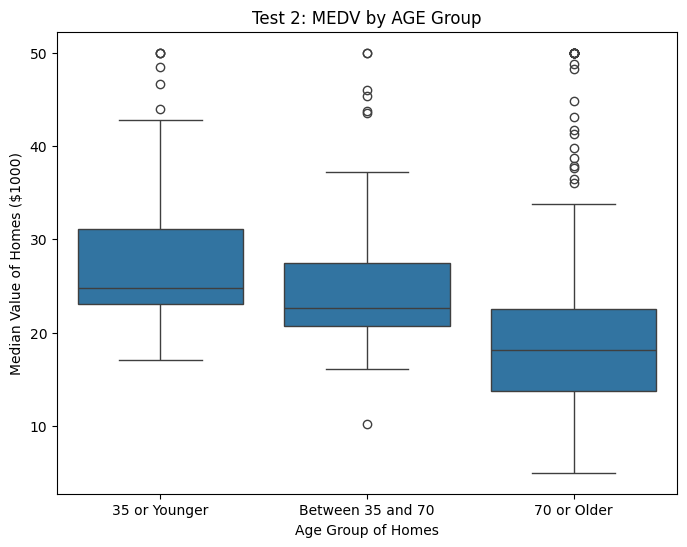

Test 2: ANOVA Results:
                 sum_sq     df         F        PR(>F)
AGE_GROUP   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN
Reject the null hypothesis: There is a significant difference in median values for different AGE groups.


In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Test 2: MEDV by AGE Group')
plt.xlabel('Age Group of Homes')
plt.ylabel('Median Value of Homes ($1000)')
plt.show()

# Perform ANOVA (for reference)
anova_model = ols('MEDV ~ AGE_GROUP', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("Test 2: ANOVA Results:")
print(anova_table)

# Hypothesis
# H0: There is no significant difference in the median values for different AGE groups
# Ha: There is a significant difference in the median values for different AGE groups
if anova_table['PR(>F)'].iloc[0] < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values for different AGE groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values for different AGE groups.")

## Test 3: Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS)?
### Pearson Correlation

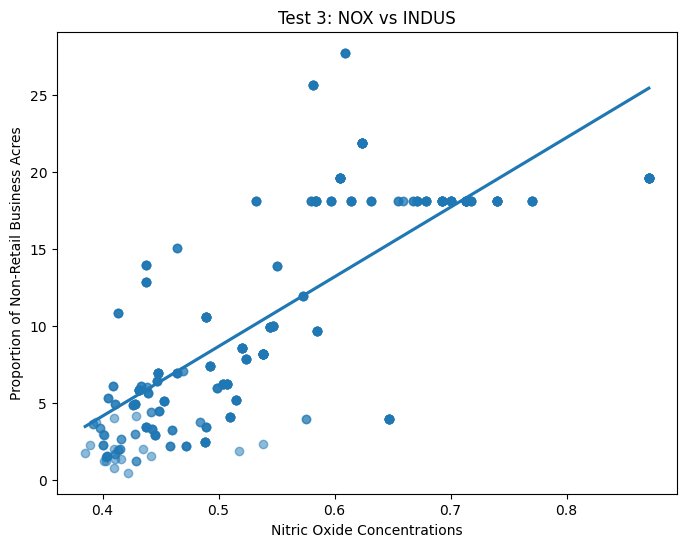

Reject the null hypothesis: There is a significant relationship between NOX and INDUS.


In [48]:
plt.figure(figsize=(8, 6))
sns.regplot(x='NOX', y='INDUS', data=boston_df, ci=None, scatter_kws={'alpha': 0.5})
plt.title('Test 3: NOX vs INDUS')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

# Perform Pearson correlation (for reference)
corr, p_corr = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
# Hypothesis
# H0: There is no relationship between NOX and INDUS (correlation = 0)
# Ha: There is a relationship between NOX and INDUS (correlation ≠ 0)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between NOX and INDUS.")



## Test 4: What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV)?
### Regression analysis

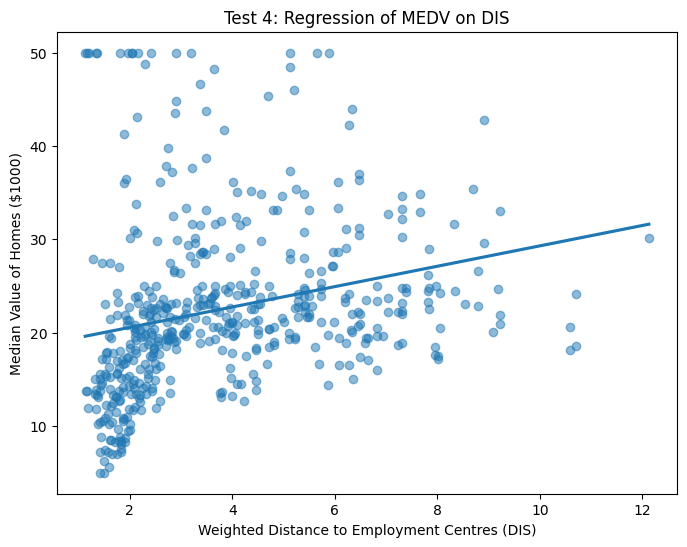

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        20:31:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [49]:
plt.figure(figsize=(8, 6))
sns.regplot(x='DIS', y='MEDV', data=boston_df, ci=None, scatter_kws={'alpha': 0.5})
plt.title('Test 4: Regression of MEDV on DIS')
plt.xlabel('Weighted Distance to Employment Centres (DIS)')
plt.ylabel('Median Value of Homes ($1000)')
plt.show()

X = boston_df['DIS']
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
print(model.summary())

### There is a statistically significant positive impact of DIS on MEDV. Specifically, an additional unit increase in weighted distance to the five Boston employment centers is associated with an average increase of approximately $1,092 in the median home value. However, since the R-squared is relatively low, other factors also play an important role in determining home values.